### **案例**
💡**以汽车引擎的马力和峰值转速为特征量，预测其在城市路况中的每公里所耗油量加仑数**

In [1]:
import numpy as np
from numpy import genfromtxt
data = genfromtxt('datasets/automobile/imports-85.csv', delimiter=',')

# 使用布尔索引过滤 NaN 值
mask = ~np.isnan(data[:, 21]) & ~np.isnan(data[:, 22]) & ~np.isnan(data[:, 23])

data = np.array([data[mask, 21], data[mask, 22], data[mask, 23]])
print(data.shape)

(3, 203)


In [3]:
from sklearn.model_selection import train_test_split
x_data = data[:-1].T
y_data = data[-1]
print(x_data.shape, y_data.shape)
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

(203, 2) (203,)


In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

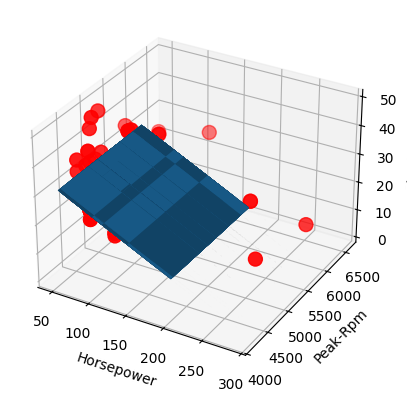

In [5]:
import matplotlib.pylab as plt

ax = plt.figure().add_subplot(111, projection='3d')
ax.scatter(x_data[:, 0], x_data[:, 1], y_data, c='r', marker='o', s=100)
x0 = x_data[:, 0]
x1 = x_data[:, 1]
x0, x1 = np.meshgrid(x0, x1)
z = model.intercept_ + x0 * model.coef_[0] + x1 * model.coef_[1]
ax.plot_surface(x0, x1, z)
ax.set_xlabel('Horsepower')
ax.set_ylabel('Peak-Rpm')
ax.set_zlabel('City MPG')
plt.show()

# 标准方程法

在机器学习中，**标准方程法（Normal Equation）** 是一种用于直接求解线性回归模型参数（权重）的解析方法。它通过数学推导一次性计算出最优参数，*避免了迭代优化过程（如梯度下降）*。以下是关键点总结：

---

### **1. 核心思想**

• **目标**：最小化线性回归的损失函数（均方误差，MSE）。

• **方法**：对损失函数关于参数向量求导，并令导数为零，直接解出最优参数。

---

### **2. 公式**
对于线性模型 $ y = X\theta + \epsilon $（$X$ 为设计矩阵，$\theta$ 为参数向量），最优参数 $\theta$ 的解为：
$$
\theta = (X^T X)^{-1} X^T y
$$
• **前提**：矩阵 $X^T X$ 必须可逆（即 $X$ 列满秩）。

---

### **3. 优缺点**
+ **优点**：

    + **无需学习率或迭代**：直接得到解析解。

    + **计算高效**：当特征维度 $n$ 较小时（如 $n < 10^4$），计算速度快。

+ **缺点**：
    + **计算复杂度高**：矩阵求逆的复杂度为 $O(n^3)$，特征多时计算昂贵。

    + **需矩阵可逆**：若 $X^T X$ 奇异（如特征共线），需使用伪逆或正则化（如岭回归）。

---

### **4. 与梯度下降对比**
| **标准方程法** | **梯度下降**    |
|-----------|-------------|
| 直接解析解     | 迭代逼近最优解     |
| 无需调学习率    | 需选择学习率和迭代次数 |
| 适合小规模数据   | 适合大规模或高维数据  |
| 一次计算完成    | 多次迭代更新参数    |

举例说明标准方程法如何一步求出 MSE 的极小值

### **5. 举例说明**

太好了！那我们就更通俗一点，每一步都详细写出矩阵是怎么展开的，让你能看清楚每个元素是怎么来的。不需要你完全懂线性代数，咱们一点点来看。

我们还是用一个小例子来讲解：
假设我们有 3 个样本，每个样本只有 1 个特征（比如房子的面积），目标是预测房价：

| 样本编号 | 特征 x（面积） | 目标 y（房价） |
|------|----------|----------|
| 1    | 1        | 2        |
| 2    | 2        | 3        |
| 3    | 3        | 4        |

---

## 🔢 第一步：构造矩阵 X 和向量 y

我们加上一列全是 1 的偏置项（为了学到截距 $ \theta_0 $）：

$$
X =
\begin{bmatrix}
1 & 1 \\
1 & 2 \\
1 & 3
\end{bmatrix}
\quad
y =
\begin{bmatrix}
2 \\
3 \\
4
\end{bmatrix}
$$

注意：
- 每一行代表一个样本
- 第 1 列是 1（偏置项）
- 第 2 列是特征值 x
- y 是每个样本对应的输出值

---

## ✍️ 第二步：计算 $ X^T X $

$ X^T $ 是 X 的转置（行列互换）：

$$
X^T =
\begin{bmatrix}
1 & 1 & 1 \\
1 & 2 & 3
\end{bmatrix}
$$

现在我们计算：

$$
X^T X =
\begin{bmatrix}
1 & 1 & 1 \\
1 & 2 & 3
\end{bmatrix}
\cdot
\begin{bmatrix}
1 & 1 \\
1 & 2 \\
1 & 3
\end{bmatrix}
$$

我们来一项一项地乘出来（2×3 乘 3×2，结果是 2×2）：

- 第 1 行第 1 列：
  $$
  1×1 + 1×1 + 1×1 = 3
  $$
- 第 1 行第 2 列：
  $$
  1×1 + 1×2 + 1×3 = 6
  $$
- 第 2 行第 1 列：
  $$
  1×1 + 2×1 + 3×1 = 6
  $$
- 第 2 行第 2 列：
  $$
  1×1 + 2×2 + 3×3 = 14
  $$

结果：

$$
X^T X =
\begin{bmatrix}
3 & 6 \\
6 & 14
\end{bmatrix}
$$

---

## ✍️ 第三步：计算 $ X^T y $

我们还是用刚才的 $ X^T $，乘上 y：

$$
X^T =
\begin{bmatrix}
1 & 1 & 1 \\
1 & 2 & 3
\end{bmatrix}
\quad
y =
\begin{bmatrix}
2 \\
3 \\
4
\end{bmatrix}
$$

相乘（2×3 乘 3×1，结果是 2×1 向量）：

- 第 1 行：
  $$
  1×2 + 1×3 + 1×4 = 9
  $$
- 第 2 行：
  $$
  1×2 + 2×3 + 3×4 = 20
  $$

结果：

$$
X^T y =
\begin{bmatrix}
9 \\
20
\end{bmatrix}
$$

---

## ✍️ 第四步：计算 $ (X^T X)^{-1} $

我们现在有：

$$
X^T X =
\begin{bmatrix}
3 & 6 \\
6 & 14
\end{bmatrix}
$$

我们要求它的逆矩阵 $ (X^T X)^{-1} $

2×2 矩阵的逆矩阵公式是：

$$
\begin{bmatrix}
a & b \\
c & d
\end{bmatrix}^{-1}
=
\frac{1}{ad - bc}
\begin{bmatrix}
d & -b \\
-c & a
\end{bmatrix}
$$

带入：

- $ a = 3, b = 6, c = 6, d = 14 $
- 行列式：$ ad - bc = 3×14 - 6×6 = 42 - 36 = 6 $

所以：

$$
(X^T X)^{-1} =
\frac{1}{6}
\begin{bmatrix}
14 & -6 \\
-6 & 3
\end{bmatrix}
=
\begin{bmatrix}
14/6 & -1 \\
-1 & 0.5
\end{bmatrix}
$$

---

## ✍️ 第五步：代入标准方程公式求 $ \theta $

公式是：

$$
\theta = (X^T X)^{-1} X^T y
$$

我们代入：

$$
\theta =
\begin{bmatrix}
14/6 & -1 \\
-1 & 0.5
\end{bmatrix}
\cdot
\begin{bmatrix}
9 \\
20
\end{bmatrix}
$$

手动计算：

- 第 1 行：
  $$
  \frac{14}{6}×9 + (-1)×20 = 21 - 20 = 1
  $$
- 第 2 行：
  $$
  -1×9 + 0.5×20 = -9 + 10 = 1
  $$

结果：

$$
\theta =
\begin{bmatrix}
1 \\
1
\end{bmatrix}
$$

---

## ✅ 最终模型

我们找到的回归模型是：

$$
\hat{y} = 1 + 1 \cdot x
$$

也就是说：

- 当 x = 1，预测 y = 2
- 当 x = 2，预测 y = 3
- 当 x = 3，预测 y = 4

完美拟合原始数据！